# Mike Winters - Take-Home Exercise
## A Brief Analysis and Roadmap

In this document, I'll share a brief analysis of month-over-month product engagement from January 2017 through October 2019 and highlight a few key trends, then I'll share a plan of action / roadmap to address these trends with an objective of improved engagement.

Given the size and complexity of the dataset (not super large, not super complex), using a Jupyter notebook might seem like overkill, but I believe that for an project that combines data analysis and strategic planning, _and_ will be consumed asynchronously (rather than presented in a meeting, for example), it's fitting choice. It also provides a bit more insight into my thought process. 

### Table of Contents

_Unfortunately, these links won't be clickable if you're previewing the notebook in GitHub–for these links to work, you'll need to clone the repo and run the notebook locally._

[1. Data Prep](#data-prep) (Just in case you're curious how I handled the data. But you can skip this, and the analysis and roadmapping start in the next section.)<br> 
[2. Month-over-month Engagement Trends](#growth-engagement)<br>
[3. Device Usage Trends](#data-usage-trends)<br>
[4. Analysis Wrap-Up, Initial Hypothesis, and User Interviews](#hypothesis-interviews)<br>

## 1. Data Prep <a name="data-prep"></a>

In [1]:
# Let's import what we'll use for our analysis. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# And let's create a dataframe with our dataset. 
df = pd.read_csv('honeypot-data.csv')

In [3]:
# Looking good? Yep, looking good. 
df.head()

,Month,MonthNum,Date,Year,Users,New users,Returning users,Registered users,Desktop users,Tablet users,...,Article comments,Safari session,Chrome session,Firefox session,Android Webview session,Safari (in-app) session,Internet Explorer session,Edge session,Opera session,Other browser session
0,January,1,1,2017,58021,23009,35012,7708,28747,5773,...,49568,40841,44080,10234,826,826,3582,2047,41,273
1,February,2,1,2017,58416,22288,36128,8673,27783,5647,...,46853,40399,42819,9891,820,820,3364,2002,41,358
2,March,3,1,2017,61158,24924,36234,8346,27873,5735,...,47834,41484,43183,9923,845,845,3280,2034,42,451
3,April,4,1,2017,57650,23225,34425,7611,25674,5349,...,44037,39112,39988,9140,800,800,2936,1897,40,496
4,May,5,1,2017,57205,23709,33496,7661,25800,5443,...,44381,40231,40401,9185,825,825,2869,1931,41,577


In [4]:
# Rename columns so we can use to_datetime to create a new column
df.rename(columns = {'MonthNum':'month', 'Date':'day','Year':'year'}, inplace = True) 

In [5]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,Month,month,day,year,Users,New users,Returning users,Registered users,Desktop users,Tablet users,...,Safari session,Chrome session,Firefox session,Android Webview session,Safari (in-app) session,Internet Explorer session,Edge session,Opera session,Other browser session,datetime
0,January,1,1,2017,58021,23009,35012,7708,28747,5773,...,40841,44080,10234,826,826,3582,2047,41,273,2017-01-01
1,February,2,1,2017,58416,22288,36128,8673,27783,5647,...,40399,42819,9891,820,820,3364,2002,41,358,2017-02-01
2,March,3,1,2017,61158,24924,36234,8346,27873,5735,...,41484,43183,9923,845,845,3280,2034,42,451,2017-03-01
3,April,4,1,2017,57650,23225,34425,7611,25674,5349,...,39112,39988,9140,800,800,2936,1897,40,496,2017-04-01
4,May,5,1,2017,57205,23709,33496,7661,25800,5443,...,40231,40401,9185,825,825,2869,1931,41,577,2017-05-01


In [6]:
# Set datetime column to index so we can analyze app performance over time.
df_timeseries = df.set_index('datetime')
df_timeseries.head()

,Month,month,day,year,Users,New users,Returning users,Registered users,Desktop users,Tablet users,...,Article comments,Safari session,Chrome session,Firefox session,Android Webview session,Safari (in-app) session,Internet Explorer session,Edge session,Opera session,Other browser session
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01,January,1,1,2017,58021,23009,35012,7708,28747,5773,...,49568,40841,44080,10234,826,826,3582,2047,41,273
2017-02-01,February,2,1,2017,58416,22288,36128,8673,27783,5647,...,46853,40399,42819,9891,820,820,3364,2002,41,358
2017-03-01,March,3,1,2017,61158,24924,36234,8346,27873,5735,...,47834,41484,43183,9923,845,845,3280,2034,42,451
2017-04-01,April,4,1,2017,57650,23225,34425,7611,25674,5349,...,44037,39112,39988,9140,800,800,2936,1897,40,496
2017-05-01,May,5,1,2017,57205,23709,33496,7661,25800,5443,...,44381,40231,40401,9185,825,825,2869,1931,41,577


## 2. Month-over-month Growth and Engagement Trends <a name="growth-engagement"></a>

### Core growth metrics: Users and Article views

OK, first, let's take a look at our two "core" growth metrics: Users and Article views

We see that both metrics are growing over time. I'm pretty curious about those user spikes at the beginning of 2018 and 2019. But I'm going to assume we're a diligent team and have already looked into those and can explain them, and I'll focus on longer-term trends instead.

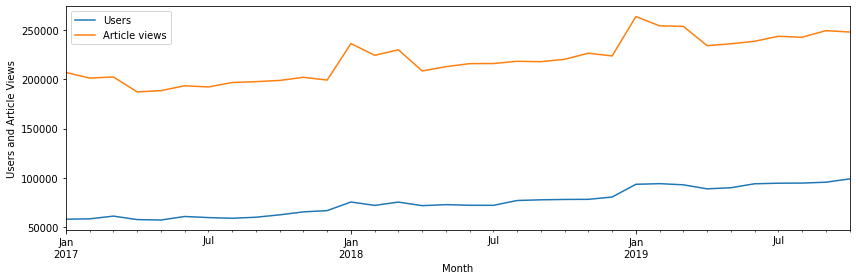

In [7]:
plt.figure(figsize=(20,10))
core_growth = ['Users', 'Article views']
for metric in core_growth:
    df_timeseries[metric].plot(figsize=(12,4),label=metric)
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Users and Article Views')
plt.legend()
plt.tight_layout()

### Other Engagement Metrics: Upvotes and Comments

Let's also look at month-over-month trends for counts of upvotes and comments.

These metrics are also generally growing steady steadily and tracking similarly to **Article views** and **Users**, with **Article upvotes** showing the same interesting spikes in early 2018 and 2019

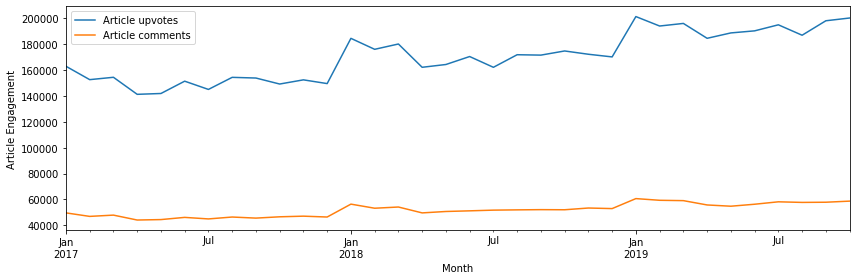

In [8]:
plt.figure(figsize=(20,10))
other_engagement = ['Article upvotes', 'Article comments']
for metric in other_engagement:
    df_timeseries[metric].plot(figsize=(12,4),label=metric)
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Article Engagement')
plt.legend()
plt.tight_layout()

### Per-User Article views, Upvotes, and Comments

Ultimately, though, I'm more interested in how the data is trending on a _per user_ basis rather than in aggregate. We could invest in user acquisition-focused features or marketing efforts to try to move the "Users" metric, but if engagement at the *user level* is trending in the wrong direction, then these UA initiatives might end up being a poor use of time. 

**Indeed, in the visualization below, we see a steady decline in month-over-month per user engagement. This seems significant.**

In [9]:
# Add column with article views per user
df_timeseries['Article Views Per User'] = df_timeseries['Article views'] / df_timeseries['Users']

# Add column with upvotes per user
df_timeseries['Upvotes Per User'] = df_timeseries['Article upvotes'] / df_timeseries['Users']

# Add column with comments per user
df_timeseries['Comments Per User'] = df_timeseries['Article comments'] / df_timeseries['Users']

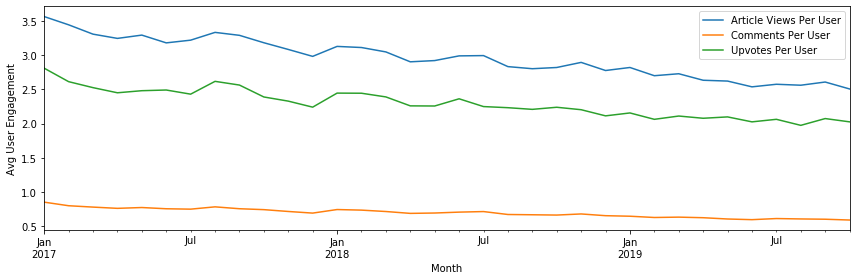

In [10]:
plt.figure(figsize=(20,10))
per_user = ['Article Views Per User', 'Comments Per User', 'Upvotes Per User']
for metric in per_user:
    df_timeseries[metric].plot(figsize=(12,4),label=metric)
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Avg User Engagement')
plt.legend()
plt.tight_layout()

## 3. Device Usage Trends <a name="data-usage-trends"></a>

The dataset might also provide us with some insight into product usage trends. Looking at what we have, I'd be most interested in understanding how the share of **Mobile users** vs. **Desktop users** vs. **Tablet users** has changed over time. 

I would also be interested in seeing engagement metrics by device type–that's definitely a dataset I would request during an analysis project like this one. 

In the visualization below, we see that **Mobile Share is up significantly** and **Desktop Share is down significantly**, while **Tablet Share is more or less flat**.

In [13]:
df_timeseries['Mobile Share'] = df_timeseries['Mobile users'] / df_timeseries['Users']
df_timeseries['Desktop Share'] = df_timeseries['Desktop users'] / df_timeseries['Users']
df_timeseries['Tablet Share'] = df_timeseries['Tablet users'] / df_timeseries['Users']

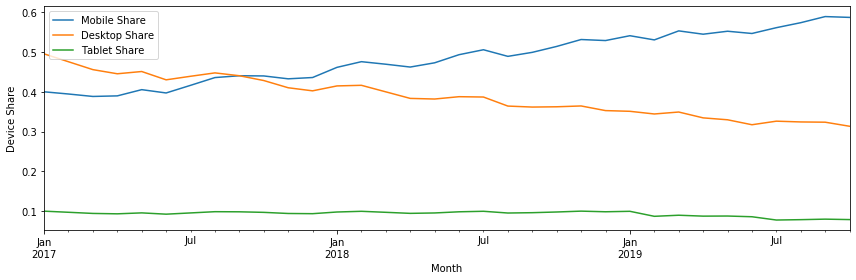

In [14]:
plt.figure(figsize=(20,10))
device_usage = ['Mobile Share', 'Desktop Share', 'Tablet Share']
for metric in device_usage:
    df_timeseries[metric].plot(figsize=(12,4),label=metric)
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Device Share')
plt.legend()
plt.tight_layout()

## 4. Analysis Wrap-Up, Initial Hypothesis, and User Interviews <a name="hypothesis-interviews"></a>

We've come across something interesting in this brief analysis:
• **Users** and **Article views** have been growing pretty steadily
• But per user engagement (**Article Views Per User**, **Comments Per User**, and **Upvotes Per User**) have been declining steadily
• And the percentage of users who are visiting the site on a mobile device (**Mobile Share**) has increased steadily. 

**A hypothesis to test:** User engagement is declining because Hacker News provides a poor mobile experience (no native apps, website that isn't optimized for mobile) even as a larger share of users engage with the app on mobile devices.

_It'd be really interesting to break down engagement metrics by device type to see if mobile user engagement is in fact significantly worse than desktop user engagement._

### I focused on the "highest-priority" metrics as laid out in the case study, but there's lots else that would be interesting to explore in the data. For the sake of time, I'm going to skip that and move on for now. A few things I'd also want to under
• Month-over-month user retention<br>
• % of monthly users who are registered<br>
• Engagement per _registered_ user.<br>

### User Interviews
Before moving forward with a costly project such as, for example, a mobile web rebuild or native mobile app new build, I'd want to get in touch with users and confirm our hypothesis about declining engagement due to poor mobile experience as product usage shifts to mobile. 

Here are examples of the questions I'd want to ask (just a quick brain dump–these would need some reframing or editing):<br><br>
• How do you prefer to engage with Hacker News, and why?<br>
• Can you describe what it was like the last time you visited Hacker News on a mobile device?<br>
• Can you describe the last time you interacted with an article on Hacker News–either an upvote or comment–on a mobile device?<br>
• Can you describe the last time you shared an article on a mobile device?<br>
• How do you prefer to engage with other, similar news apps, and why?<br>
